In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [37]:
# paths for the three dfs

df_jan_path = "/content/yellow_tripdata_2016-01.csv"
df_feb_path = "/content/yellow_tripdata_2016-02.csv"
df_mar_path = "/content/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [10]:
df_jan

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=26,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [11]:
# concat the three dataframes as one.

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0)

New york bounding box:

* min_latitude = 40.60

* max_latitude = 40.85

* min_longitude = -74.05

* max_longitude = -73.70

In [12]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [13]:
# fare amount column
fare_amount = df_final["fare_amount"].compute()

# trip distance column
trip_distance = df_final["trip_distance"].compute()

In [15]:
fare_amount.shape[0] / 10000000

3.2720574

In [16]:
# Percentile values for the fare amount.

percentile_values = np.arange(0.991,1.000, 0.001)

print(percentile_values)

fare_amount.quantile(percentile_values)

[0.991 0.992 0.993 0.994 0.995 0.996 0.997 0.998 0.999 1.   ]


,fare_amount
0.991,52.00
0.992,52.00
0.993,52.00
0.994,52.00
0.995,55.00
0.996,59.00
0.997,63.50
0.998,69.00
0.999,82.50
1.000,111270.85


In [21]:
# since the maximum fare amount is 82.50 so setting max fare amount. 111270.85 <- this can be consider as a outlier.
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.50

print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
82.5


In [22]:
trip_distance.quantile(percentile_values)

,trip_distance
0.991,18.88
0.992,19.10
0.993,19.40
0.994,19.72
0.995,20.14
0.996,20.60
0.997,21.20
0.998,22.00
0.999,24.90
1.000,8000010.00


In [24]:
# percentile values for trip_distance

min_trip_distance_val = 0.25
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.9


## **Remove Outliers from the Data**

In [25]:
# select data points within the given ranges

df_final = df_final.loc[
    (df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) &
    (df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) &
    (df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) &
    (df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")),
:]

In [26]:
df_final = df_final.loc[
    (df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) &
    (df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))
]

## **Location Based Columns**

In [27]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude',
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=78,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


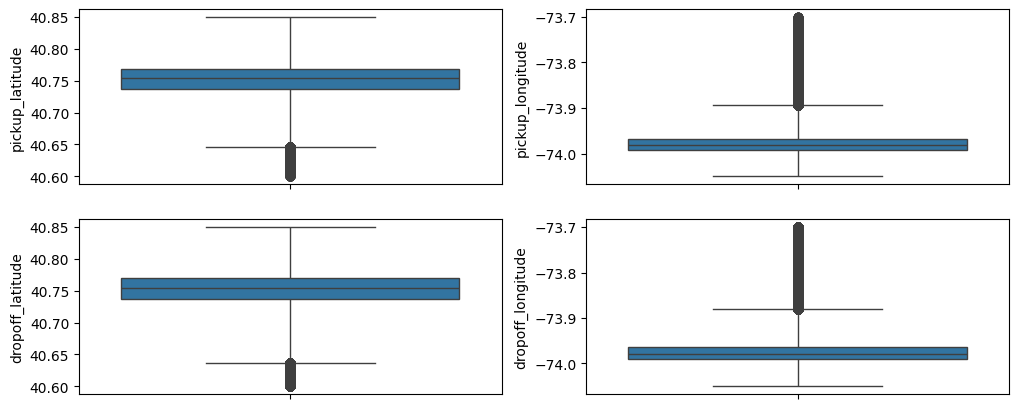

In [28]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2],whis=3)

## **Trip Distance**

<Axes: ylabel='trip_distance'>

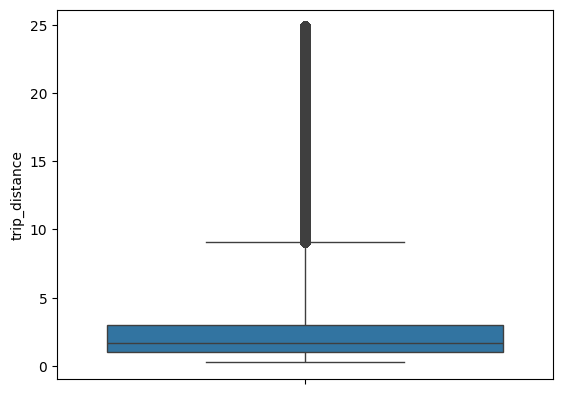

In [29]:
# boxplot for the trip distance.

sns.boxplot(df_final.loc[:,"trip_distance"].compute(), whis=3)

## **Fare Amount**

<Axes: ylabel='fare_amount'>

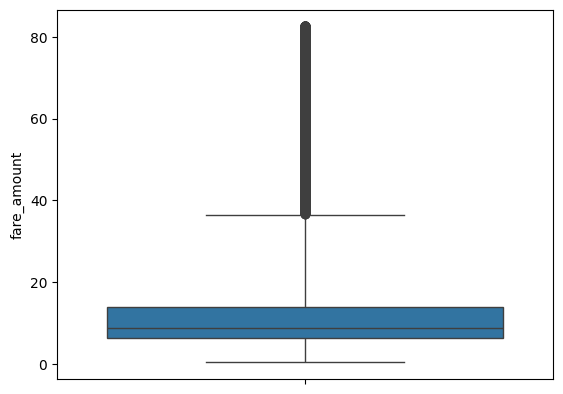

In [30]:
# boxplot for the fare amount.

sns.boxplot(df_final.loc[:,"fare_amount"].compute(), whis=3)

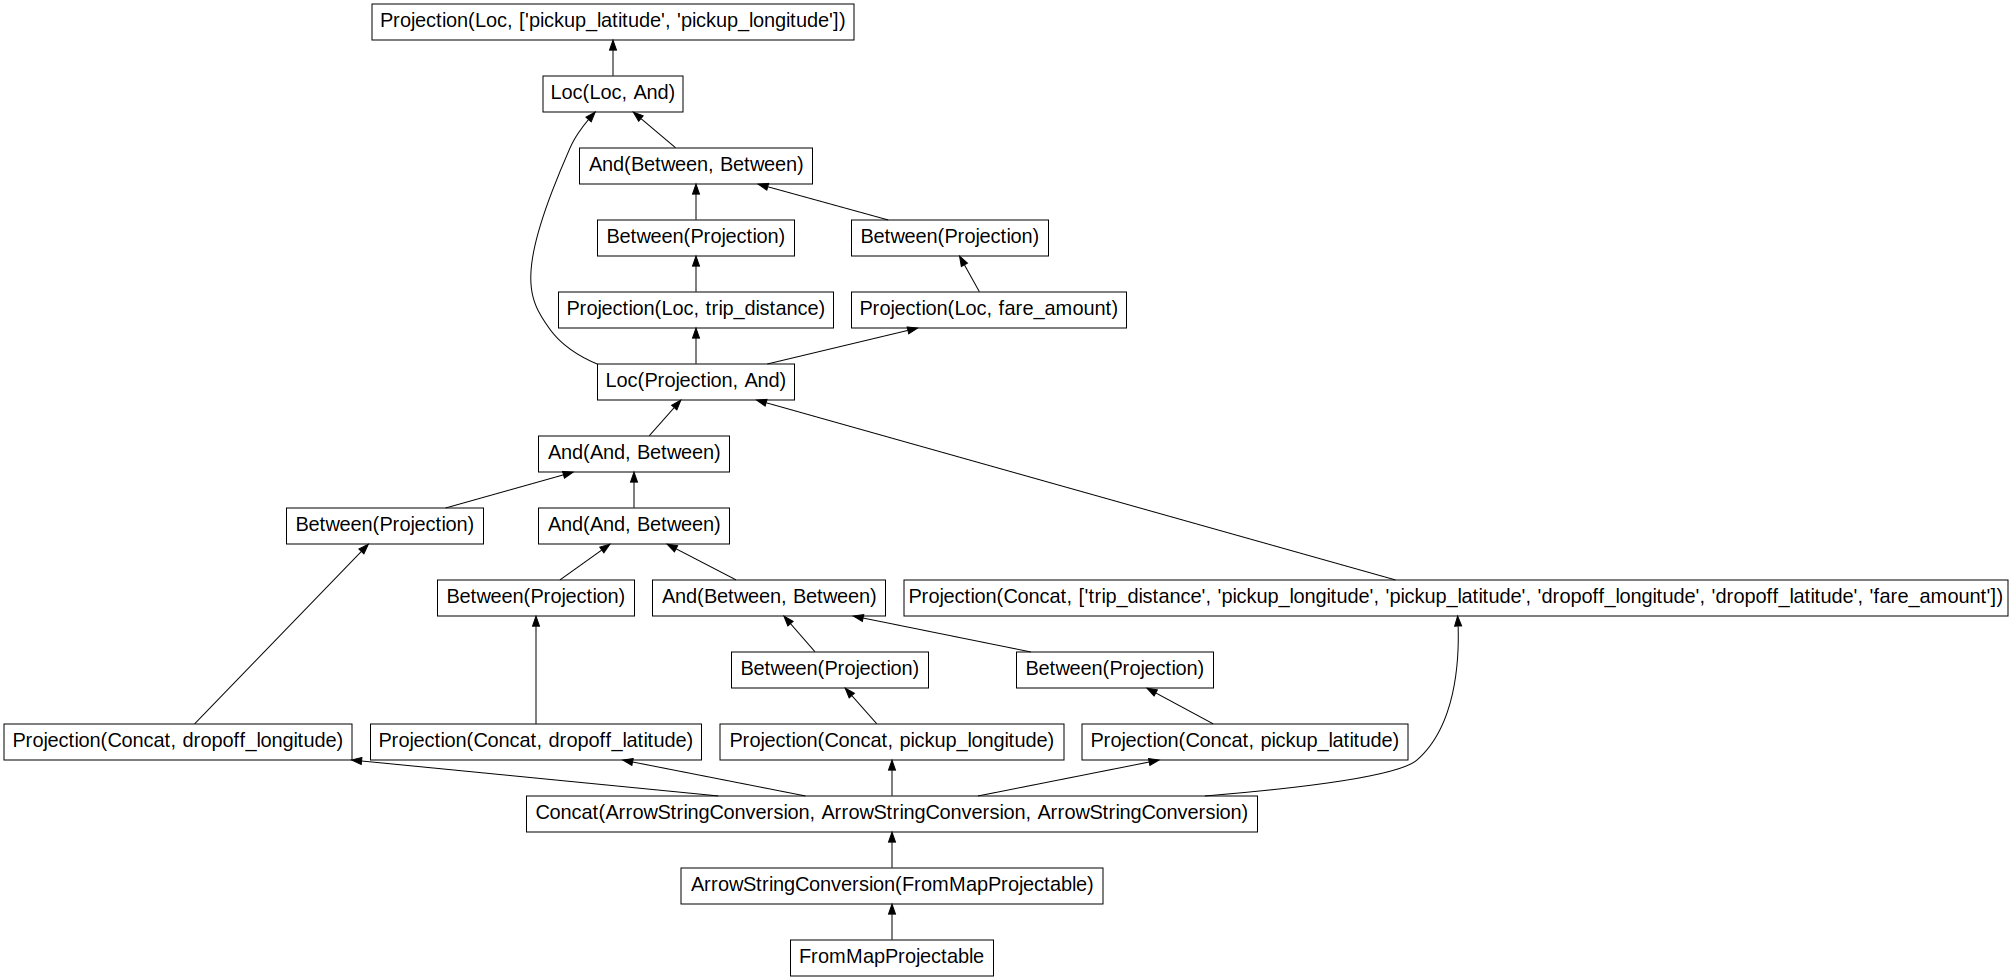

In [31]:
# save the pickup coordinates dataset.

save_path = "../location_data.csv"

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']]
pickup_coord_dataset.visualize()

In [32]:
# form the dataset

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()

print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (31516830, 2)


In [34]:
pickup_coord_dataset

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625
...,...,...
418490,40.750751,-74.003578
418491,40.734852,-74.002159
418492,40.751011,-74.003578
418494,40.766586,-73.994240


In [36]:
save_path = "/content/location_data.csv"

# save the dataset

pickup_coord_dataset.to_csv(save_path, index=False)